<a href="https://colab.research.google.com/github/Arnavvv16/AI_Notes/blob/main/KTS_25_26_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression using Scikit Learn

1. Import Modules

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

2. Create dataset, perform polynomial regression

In [ ]:
#Generating random 2D array
x = 6 * np.random.rand(100, 1) - 3 #Generates 100 random values uniformly distributed between -3 and +3.

#Generating values of y which follow a specific curve
y = 2 + 3*x - 4*x**2 + 0.5*x**3 + np.random.randn(100, 1) #Gaussian noise added

#Transforming values of x into a 2D array with values of coefficients of x
poly_features = PolynomialFeatures(degree = 3, include_bias = False) #Transforms x into degree number of features
x_poly = poly_features.fit_transform(x)

#In this case degree = 3, so x is transformed into 3 features: [x, x^2, x^3] on which we will proceed to do linear regression

reg = LinearRegression() #LinearRegression fits a linear model using the transformed features: [x, x^2, x^3]
reg.fit(x_poly, y)

LinearRegression()

3. Extract the learned coefficients

In [ ]:
w0 = reg.intercept_[0]
w1 = reg.coef_[0][0]
w2 = reg.coef_[0][1]
w3 = reg.coef_[0][2]

4. Plot!

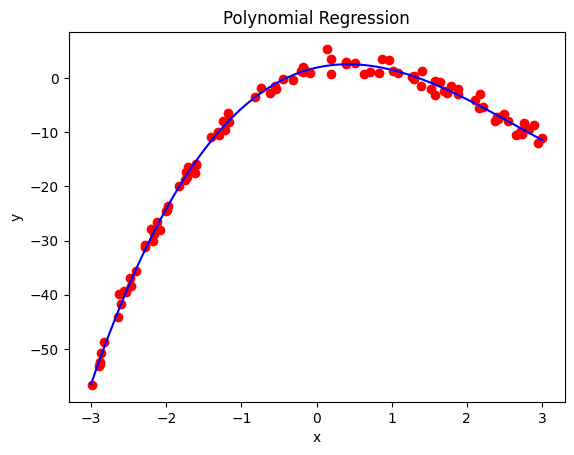

In [ ]:
# Plotting the data and model
plt.figure()
plt.plot(x, y, 'ro')
x_line = np.linspace(-3, 3, 100)
y_line = w0 + w1*x_line + w2*x_line**2 + w3*x_line**3
plt.plot(x_line, y_line, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

# Bias-Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning that helps us understand model performance in terms of underfitting, overfitting, and generalization. We will try to see the same here.

1. Imports and Data Generation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Generate X values uniformly from -3 to 3
X = np.random.uniform(-3, 3, 75).reshape(-1, 1)

# True function: y = 0.5x^3 - x^2 + 2x + 7 + noise
def true_function(x):
    return 0.5 * x**3 - x**2 + 2*x + 7

# Add Gaussian noise
y = true_function(X) + np.random.normal(0, 2, X.shape)

2. Visualize the true data

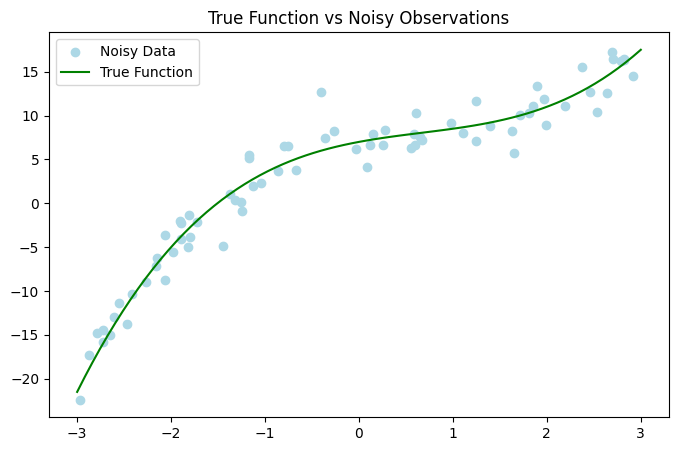

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Noisy Data", color='lightblue')
x_line = np.linspace(-3, 3, 75).reshape(-1, 1)
plt.plot(x_line, true_function(x_line), label="True Function", color='green')
plt.title("True Function vs Noisy Observations")
plt.legend()
plt.show()

3. We’ll train models with increasing degree and observe how training/test error change.

In [ ]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
degrees = range(1, 15)
train_errors = []
test_errors = []

for degree in degrees:
    # Transform input features to polynomial
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit linear model on transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and calculate errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)


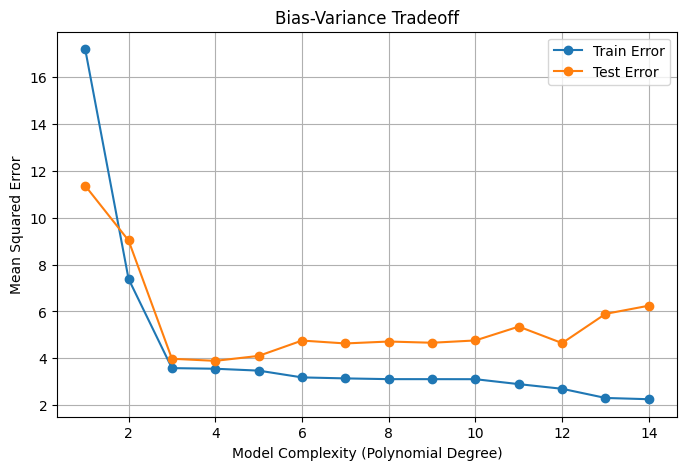

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Train Error", marker='o')
plt.plot(degrees, test_errors, label="Test Error", marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

5. Play around!

In [ ]:
!pip install -q ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta 0:00:00


(Drag the slider to see how the plot fits to the data for varying degrees)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

# Reuse previously defined true function
def true_function(x):
    return 0.5 * x**3 - x**2 + 2

# Generate data again for clarity
np.random.seed(42)
X = np.random.uniform(-3, 3, 75).reshape(-1, 1)
y = true_function(X) + np.random.normal(0, 2, X.shape)

# Smooth X for plotting predictions
x_line = np.linspace(-3, 3, 200).reshape(-1, 1)

def plot_polyfit(degree):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    x_line_poly = poly.transform(x_line)

    # Fit model
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(x_line_poly)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label='Noisy Data', alpha=0.5, color='skyblue')
    plt.plot(x_line, true_function(x_line), label='True Function', color='green')
    plt.plot(x_line, y_pred, label=f'Polynomial Degree {degree}', color='red')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create slider widget for degree
degree_slider = widgets.IntSlider(value=1, min=1, max=30, step=1, description='Degree:')
widgets.interact(plot_polyfit, degree=degree_slider)

interactive(children=(IntSlider(value=1, description='Degree:', max=30, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_polyfit(degree)>

As evident from the graph above, We can see that the straight line (degree = 1)is simply not able to capture the patterns in the data. This is a case of under-fitting.

It can also be observed from the graph, the plot tries to pass through most of the data points as the degree increases thereby increasing the variance of the model.